In [1]:
from scholarversary import OpenAlex
import networkx as nx

In [5]:

class CiteGraphWalk:

    def __init__(self, **kwargs):
        self.openalex = OpenAlex(**kwargs)
        self.graph = kwargs.get("graph", nx.DiGraph())

    def _get_author_works(self, author_search: str):
        author_uri = self.openalex.get_author_uri_by_search(
            author_search, return_slug=True
        )
        works = self.openalex.get_works(filter={"authorships.author.id": author_uri})
        return works

    def _get_work_cites(self, work_slug: str):
        cites = self.openalex.get_citers(work_slug)
        return cites

    def add_citation_network_from_work(self, work_slug: str, depth=1):
        if depth == 0:
            return
        cites = self._get_work_cites(work_slug)

        for cite in cites:
            self.graph.add_edge(work_slug, slug_from_url(cite["id"]))
            # Add node with display_name:
            self.graph.add_node(
                slug_from_url(cite["id"]),
                display_name=cite["title"],
                __labels__="work",
            )

            self.add_citation_network_from_work(
                slug_from_url(cite["id"]), depth=depth - 1
            )

In [3]:
cgw = CiteGraphWalk()

In [4]:
# Get all works by an author
works = cgw._get_author_works("Jordan K Matelsky")

In [15]:
# works[6]  # W3174465650 dotmotif
cgw.add_citation_network_from_work("W3174465650", depth=2)

[{'id': 'https://openalex.org/W4323566431', 'doi': 'https://doi.org/10.3389/fsci.2023.1017235', 'title': 'Organoid intelligence (OI): the new frontier in biocomputing and intelligence-in-a-dish', 'display_name': 'Organoid intelligence (OI): the new frontier in biocomputing and intelligence-in-a-dish', 'publication_year': 2023, 'publication_date': '2023-02-28', 'ids': {'openalex': 'https://openalex.org/W4323566431', 'doi': 'https://doi.org/10.3389/fsci.2023.1017235'}, 'language': 'en', 'primary_location': {'is_oa': True, 'landing_page_url': 'https://doi.org/10.3389/fsci.2023.1017235', 'pdf_url': 'https://www.frontiersin.org/articles/10.3389/fsci.2023.1017235/pdf', 'source': {'id': 'https://openalex.org/S4387287851', 'display_name': 'Frontiers in Science', 'issn_l': '2813-6330', 'issn': ['2813-6330'], 'is_oa': True, 'is_in_doaj': True, 'is_core': True, 'host_organization': 'https://openalex.org/P4310320527', 'host_organization_name': 'Frontiers Media', 'host_organization_lineage': ['http

In [16]:
cgw.graph.nodes(data=True)

NodeDataView({'W3174465650': {}, 'W4323566431': {'display_name': 'Organoid intelligence (OI): the new frontier in biocomputing and intelligence-in-a-dish', '__labels__': 'work'}, 'W4286208813': {'display_name': 'neuPrint: An open access tool for EM connectomics', '__labels__': 'work'}, 'W4387952169': {'display_name': 'Vimo - Visual Analysis of Neuronal Connectivity Motifs', '__labels__': 'work'}, 'W4298724002': {'display_name': 'A Survey of Visualization and Analysis in High‐Resolution Connectomics', '__labels__': 'work'}, 'W4377097428': {'display_name': 'An Evaluation Tool for Backbone Extraction Techniques in Weighted Complex Networks', '__labels__': 'work'}, 'W4283811697': {'display_name': 'Edge-colored directed subgraph enumeration on the connectome', '__labels__': 'work'}, 'W4392722031': {'display_name': 'Moral considerability of brain organoids from the perspective of computational architecture', '__labels__': 'work'}, 'W4200465430': {'display_name': 'CONFIRMS: A Toolkit for Scal

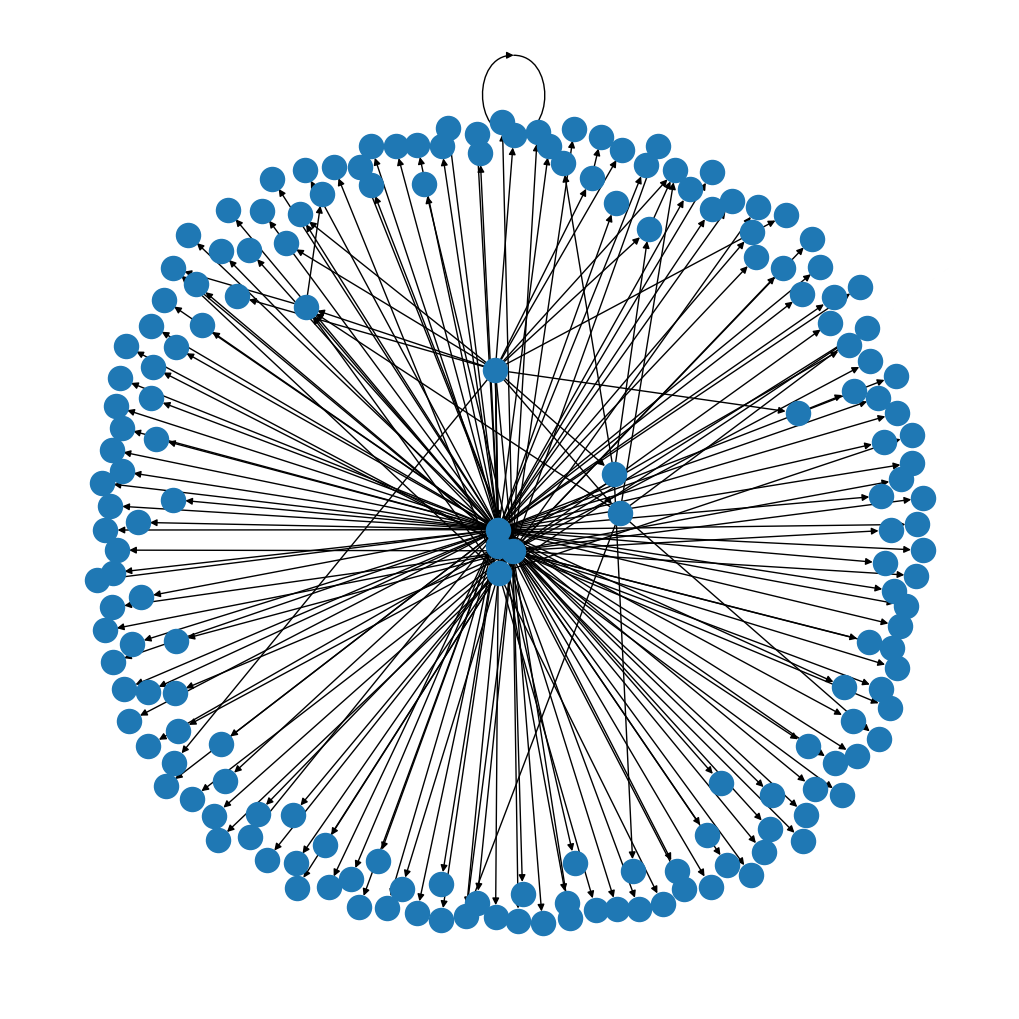

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
nx.draw(cgw.graph, with_labels=False, labels=nx.get_node_attributes(cgw.graph, "display_name"))